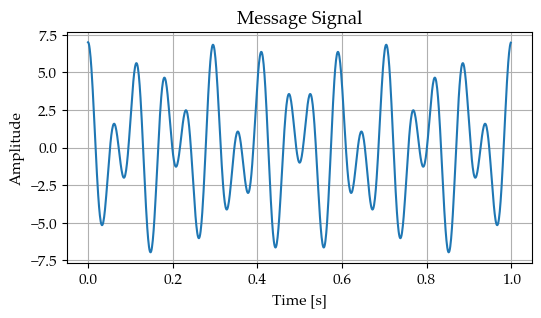

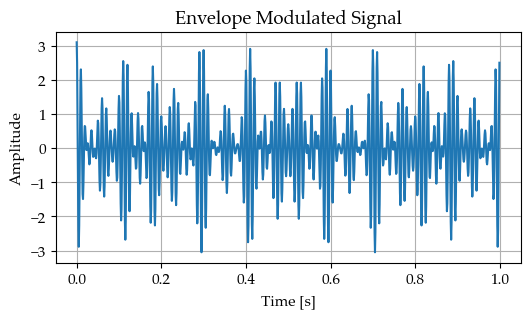

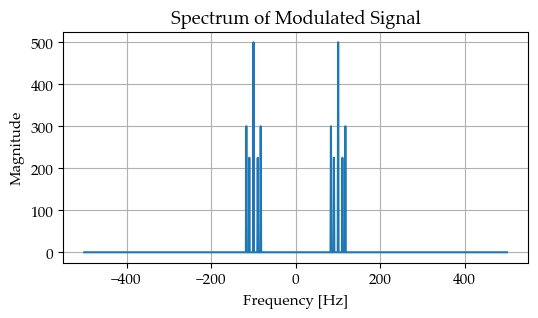

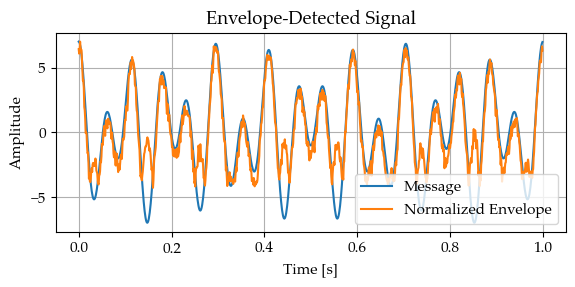

(array([ 3.1       ,  2.500983  ,  0.94733022, -0.93415031, -2.39780664,
        -2.8888413 , -2.26417905, -0.83256927,  0.79620667,  1.97951385,
         2.3062197 ,  1.74437227,  0.61744527, -0.56659481, -1.34626395,
        -1.49131382, -1.06539106, -0.35303932,  0.2996321 ,  0.64721539,
         0.63512314,  0.38547683,  0.10057367, -0.05667255, -0.04164643,
         0.06920783,  0.14376733,  0.08442397, -0.10970884, -0.34193946,
        -0.47574737, -0.415904  , -0.16613822,  0.16888165,  0.43767301,
         0.52150342,  0.3952959 ,  0.13690348, -0.11915328, -0.25665476,
        -0.23905044, -0.12310065, -0.01786147, -0.0132071 , -0.11983315,
        -0.25697911, -0.2976593 , -0.14819954,  0.18250064,  0.56598673,
         0.8053423 ,  0.7334537 ,  0.30970491, -0.33719146, -0.94856892,
        -1.24535469, -1.05903449, -0.42117912,  0.43468936,  1.16489685,
         1.46242235,  1.1926984 ,  0.45595979, -0.45316364, -1.17106164,
        -1.41917929, -1.118164  , -0.41319431,  0.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.fftpack import fft, fftshift

plt.rcParams['font.family'] = 'Palatino Linotype'
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = [6,3]
plt.rcParams['legend.loc'] = 'best'
# enable grid plotting
plt.rcParams['axes.grid'] = True


# Constants and Signal Parameters
fs = 1000  # Sampling frequency (Hz)
fc = 100   # Carrier frequency (Hz)
fm1 = 10    # Message frequency (Hz)
fm2 = 17    # Message frequency (Hz)
mod_index = 0.3  # Modulation index
A1 = 3     # Amplitude of the first sinusoid
A2 = 4     # Amplitude of the second sinusoid
phi1 = 0   # Phase of the first sinusoid
phi2 = 24   # Phase of the second sinusoid
duration = 2  # Duration of the signal in seconds
t = np.arange(0, duration, 1/fs)  # Time vector

# 1. Generate Sinusoidal Message Signal
message = A1 * np.cos(2 * np.pi * fm1 * t + 2 * np.pi * phi1) + A2 * np.cos(2 * np.pi * fm2 * t + 2 * np.pi * phi2)

# 2. Perform Envelope Modulation
carrier = np.cos(2 * np.pi * fc * t)
modulated_signal = (1 + mod_index * message) * carrier

# 3. Add AWGN Noise
noise_power = 0.01  # Noise power
noise = np.sqrt(noise_power) * np.random.normal(size=len(t))
noisy_signal = modulated_signal + noise

# 4. Envelope Detection
envelope = np.abs(hilbert(noisy_signal))
envelope_no_offset = envelope - np.mean(envelope)  # Remove DC offset
envelope_normalized = envelope_no_offset / np.max(np.abs(envelope_no_offset)) * np.max(np.abs(message))  # Normalize

# 5. Plotting

# plot the message signal
plt.figure()
plt.plot(t, message)
plt.title('Message Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the envelope modulated signal
plt.figure()
plt.plot(t, modulated_signal)
plt.title('Envelope Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Plot the spectrum
plt.figure()
f = np.linspace(-fs/2, fs/2, len(t))
modulated_spectrum = fftshift(fft(modulated_signal))
plt.plot(f, np.abs(modulated_spectrum))
plt.title('Spectrum of Modulated Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Plot the envelope-detected signal before low-pass filtering
plt.figure()
plt.plot(t, message, label='Message')
plt.plot(t, envelope_normalized, label='Normalized Envelope')
plt.title('Envelope-Detected Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.legend()
plt.show()

# SNR calculation and comparison will be done next.
modulated_signal, noisy_signal, envelope, modulated_spectrum

In [2]:
def snr(signal, noise):
    """ Calculate Signal-to-Noise Ratio (SNR) """
    signal_power = np.mean(np.abs(signal) ** 2)
    noise_power = np.mean(np.abs(noise) ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Calculate SNR before detection (pre-detection SNR)
pre_detection_snr = snr(modulated_signal, noise)

# For post-detection SNR, we consider the envelope-detected signal and noise
# Assuming low-pass filter removes most of the high-frequency noise components
post_detection_snr = snr(envelope, noise)

# Theoretical SNR
# For AM, theoretical SNR post-detection is (1.5 * modulation_index^2) times the pre-detection SNR
theoretical_snr_low = 1.5 * (mod_index**2) * pre_detection_snr
theoretical_snr_high = 1.5 * pre_detection_snr  # For high modulation index close to 1

pre_detection_snr, post_detection_snr, theoretical_snr_low, theoretical_snr_high

(19.969834828044945,
 23.043861085336648,
 2.6959277017860677,
 29.954752242067418)

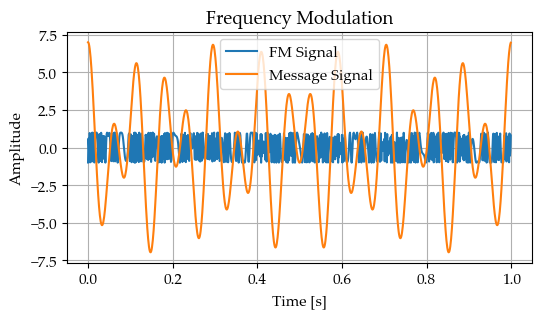

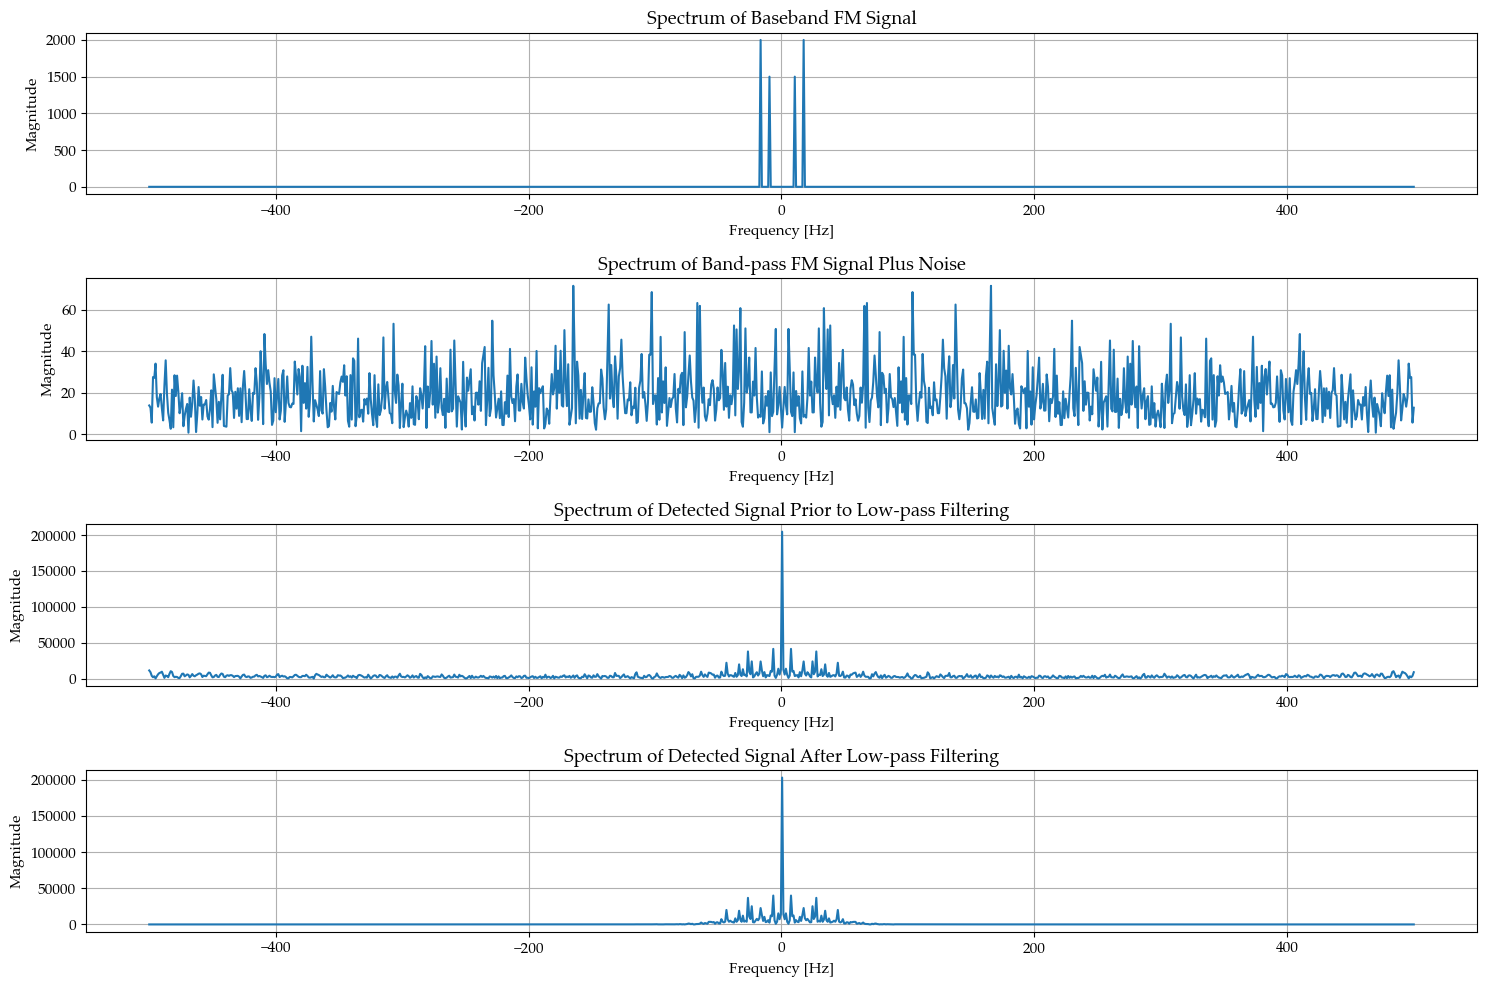

(array([-9.87688341e-01,  5.98679044e-01,  8.94314298e-02, -6.84528651e-01,
         9.70064027e-01, -9.78361369e-01,  8.67573898e-01, -7.84726117e-01,
         8.06993831e-01, -9.24479645e-01,  9.97527086e-01, -7.19635525e-01,
        -1.41714410e-01,  9.74872223e-01, -3.19589680e-01, -9.88077428e-01,
        -2.86073462e-01,  5.32851249e-01,  9.09707724e-01,  9.93502900e-01,
         9.98266920e-01,  9.68187287e-01,  7.74952929e-01,  2.30158892e-01,
        -5.88640168e-01, -9.93981480e-01, -2.37129246e-01,  9.05353864e-01,
         4.87505249e-01, -8.89916033e-01, -3.47263659e-01,  9.84648731e-01,
        -4.07382675e-02, -9.63532903e-01,  4.72709556e-01,  7.75543880e-01,
        -7.32789565e-01, -6.29410279e-01,  7.62626601e-01,  7.40239846e-01,
        -4.65810507e-01, -9.95467586e-01, -4.28000889e-01,  4.19653703e-01,
         9.09829164e-01,  9.93857799e-01,  8.89095508e-01,  7.87175653e-01,
         7.77968569e-01,  8.66363628e-01,  9.79992805e-01,  9.60713957e-01,
         6.1

In [3]:
from scipy.signal import butter, lfilter, freqz, hilbert

# Constants and Signal Parameters for FM
deviation = 75  # Frequency deviation in Hz

# 1. Generate Baseband Message Signal (Same as before)
message = A1 * np.cos(2 * np.pi * fm1 * t) + A2 * np.cos(2 * np.pi * fm2 * t)  # Reusing the same message signal

# 2. Perform Frequency Modulation (FM)
integral_of_message = np.cumsum(message) / fs
fm_signal = np.cos(2 * np.pi * fc * t + 2 * np.pi * deviation * integral_of_message)

# plot fm signal and the message on the same plot
plt.figure()
plt.plot(t, fm_signal, label='FM Signal')
plt.plot(t, message, label='Message Signal')
plt.title('Frequency Modulation')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# 3. Add AWGN Noise
fm_noisy_signal = fm_signal + noise  # Reusing the same noise

# 4. Frequency Demodulation
# For simplicity, using the derivative of the phase of the analytical signal
analytic_signal = hilbert(fm_noisy_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = np.diff(instantaneous_phase) * (fs / (2.0 * np.pi))
demodulated_signal = np.insert(instantaneous_frequency, 0, 0)  # Add a value for t=0

# Low-pass filter for demodulated signal (for post-detection)
b, a = butter(5, 2 * 50 / fs, 'low')  # Low-pass filter with a cutoff at 50 Hz
filtered_demodulated_signal = lfilter(b, a, demodulated_signal)

# 5. Plots
plt.figure(figsize=(15, 10))

# Spectrum of the baseband FM signal
plt.subplot(4, 1, 1)
baseband_fm_spectrum = fftshift(fft(message))
plt.plot(f, np.abs(baseband_fm_spectrum))
plt.title('Spectrum of Baseband FM Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the band-pass FM signal plus noise
plt.subplot(4, 1, 2)
bandpass_fm_spectrum = fftshift(fft(fm_noisy_signal))
plt.plot(f, np.abs(bandpass_fm_spectrum))
plt.title('Spectrum of Band-pass FM Signal Plus Noise')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the detected signal prior to low-pass filtering
plt.subplot(4, 1, 3)
detected_spectrum_pre_filter = fftshift(fft(demodulated_signal))
plt.plot(f, np.abs(detected_spectrum_pre_filter))
plt.title('Spectrum of Detected Signal Prior to Low-pass Filtering')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Spectrum of the detected signal after low-pass filtering
plt.subplot(4, 1, 4)
detected_spectrum_post_filter = fftshift(fft(filtered_demodulated_signal))
plt.plot(f, np.abs(detected_spectrum_post_filter))
plt.title('Spectrum of Detected Signal After Low-pass Filtering')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# SNR comparison will be performed next.
fm_signal, fm_noisy_signal, demodulated_signal, filtered_demodulated_signal

In [4]:
# Calculate SNR for FM signals
def snr_fm(signal, noise, fs):
    """ Calculate Signal-to-Noise Ratio (SNR) for FM signals """
    signal_power = np.var(signal)
    noise_power = np.var(noise)
    return 10 * np.log10(signal_power / noise_power)

# Pre-detection SNR for FM
pre_detection_snr_fm = snr_fm(fm_signal, noise, fs)

# Post-detection SNR for FM (after low-pass filtering)
post_detection_snr_fm = snr_fm(filtered_demodulated_signal, noise, fs)

pre_detection_snr_fm, post_detection_snr_fm

(16.627199236748986, 61.264168694995405)